In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet121

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

# Neurónové siete - Projekt 2

Jakub Müller, Adam Šípka </br>
Cvičenie: utorok 9:00 </br>
Semester: letný </br>
Ak. rok: 2021/2022 </br>

### Datasety: CIFAR-10 a CIFAR-100

60 000 obrázkov (32x32 pixelov) </br>
10/100 tried (6000/600 obrázkov na 1 triedu)

Začínali sme s datasetom CIFAR-10. Ako prvé bolo nutné obrázky normalizovať, aby sa RGB hodnoty nachádzali v rozmedzí 0 a 1. Vytvorili a otestovali sme viacero modelov, kde sme zväčšovali počet filtrov a pridávali konvolučné vrstvy až dovtedy, pokým nezačalo dochádzať k preučeniu. Potom sme rozmery začali znižovať, do niektorých vrstiev sme pridali dropout a pod. Výsledky troch najlepších modelov a celkový postup práce je uvedený nižšie.

### CIFAR-10

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print("Train: ", train_images.shape, "\nTest: ", test_images.shape)

Train:  (50000, 32, 32, 3) 
Test:  (10000, 32, 32, 3)


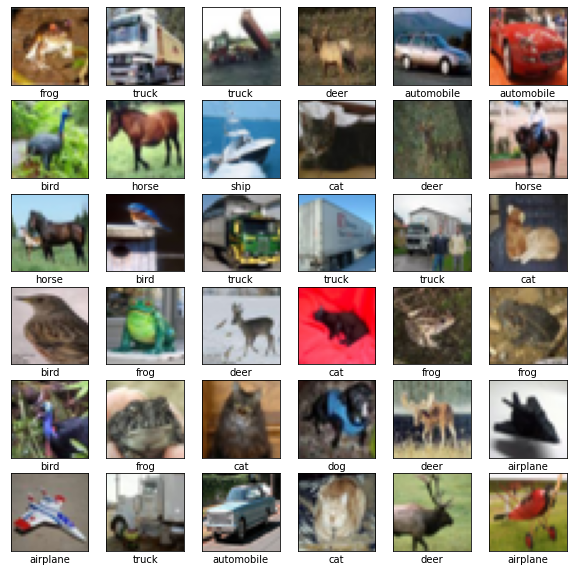

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Nižšie môžeme vidieť prvý model, ktoré sme si uložili. Po konvolučnej vrstve nasledovala normalizácia, potom pooling a následne dropout. Toto sa opakovalo 3-krát, vždy s väčším počtom filtrov. Ako aktivačnú funkciu sme použili ReLu. Ako posledné sme použili dense vrstvu a finálny output layer s aktivačnou funkciou softmax. Optimizer a loss funkciu tu nevidíme, ale vo vetkých prípadoch bol použitý optimizer Adam a Sparse Categorical Crossentropy loss, pretože s nimi sme dosahovali najlepšie výsledky. Môžeme vidieť, že celková úspešnosť bola 78%. Predchádzajúce modely nedosahovali dobré výsledky, takže sme ich neukladali. Mali menej trénovateľných parametrov, keďže v konvolučných vrstvách sme použili menej filtrov.

In [7]:
cnn_03 = load_model('cnn_03')
print('Model summary:')
cnn_03.summary()

print('\nEvaluation:')
cnn_03.evaluate(test_images, test_labels)

y_pred = cnn_03.predict(test_images)
y_classes = [np.argmax(element) for element in y_pred]

print('\nReport: \n', classification_report(test_labels, y_classes))

Model summary:
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 batch_normalization_2 (Batc  (None, 16

Druhý model, ktorý sme si uložili je výrazne väčší ako predchádzajúci, obsahuje 3,2 milióna trénovateľných parametrov. Po konvolučnej vrstve nasledovala normalizácia, potom znova konvolučná vrsvtva s ronakými parametrami, znova normalizácia, následne pooling a dropout. Tento proces sa zopakoval tri krát, vždy s dvojnásobným počtom filtrov (64, 128, 256). Na záver bola znova použitá jedna dense a jedna output vrstva. Keďže sa jedná o robustnejší model, tak aj presnosť na testovacích dátach je vyššia, dosahuje až 83%.

In [8]:
cnn_04 = load_model('cnn_04')
print('Model summary:')
cnn_04.summary()

print('\nEvaluation:')
cnn_04.evaluate(test_images, test_labels)

y_pred = cnn_04.predict(test_images)
y_classes = [np.argmax(element) for element in y_pred]

print('\nReport: \n', classification_report(test_labels, y_classes))

Model summary:
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_19 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_20 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                       

Medzi týmto a predchádzajúcim modelom sme mali ešte jeden, u ktorého došlo k preučeniu, avšak ten sme neuložili. Preto sme skúsili znížiť počet filtrov a veľkosť dense vrstvy o polovicu (filtre: 32, 64 a 128, dense vrstva: 256). Vďaka tomu mal tento model najmenej trénovateľných parametrov, len okolo 815 000. Avšak dosahoval takmer rovnako presné výsledky ako predchádzajúci, presnosť bola 82%. Práve preto ho považujeme za náš najlepší, podarilo sa nám skombinovať úspešnosť druhého a veľkosť prvého modelu. Vďaka tomu predpovedá presne a proces učenia je rýchly.

In [9]:
cnn_05 = load_model('cnn_05')
print('Model summary:')
cnn_05.summary()

print('\nEvaluation:')
cnn_05.evaluate(test_images, test_labels)

y_pred = cnn_05.predict(test_images)
y_classes = [np.argmax(element) for element in y_pred]

print('\nReport: \n', classification_report(test_labels, y_classes))

Model summary:
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_31 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_32 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_32 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                       

### CIFAR-100

Následne sme sa presunuli k datasetu CIFAR-100. Tu sme okrem nášho klasického modelu otestovali viacero typov neurónových sietí, ako napríklad DenseNet, alebo ResNet. Cieľom bolo zistiť, ktorá z nich bude dosahovať najlepšie výsledky. Aby sme proces učenia urýchlili, tak sme sa presunuli na GPU.

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
# load and prepare CIFAR-100 dataser
(train_x, train_y), (test_x, test_y) = datasets.cifar100.load_data(label_mode='fine')

# Normalize pixel values to be between 0 and 1
train_x, test_x = train_x / 255.0, test_x / 255.0

In [4]:
print('Train data:', train_x.shape, train_y.shape)
print('Test data:', test_x.shape, test_y.shape)

Train data: (50000, 32, 32, 3) (50000, 1)
Test data: (10000, 32, 32, 3) (10000, 1)


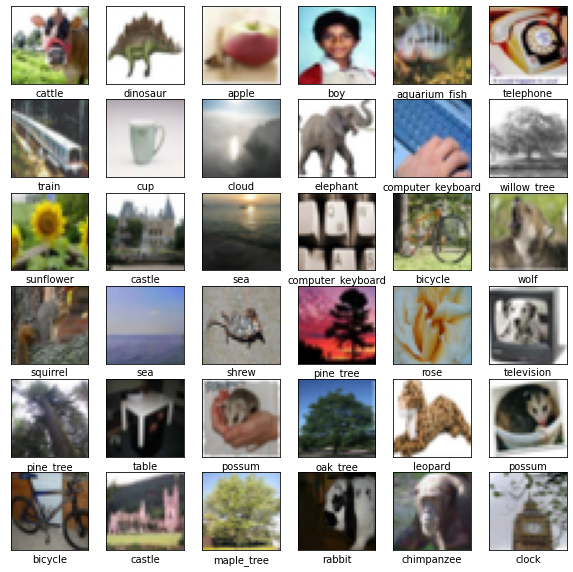

In [12]:
class_names =  ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 
           'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 
           'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard', 
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 
           'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 
           'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 
           'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 
           'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 
           'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i])
    plt.xlabel(class_names[train_y[i][0]])
plt.show()

Ako prvé sme otestovali model, ktorý bol predtým použitý pri klasifikácií CIFAR-10 datasetu. Keďže sme ale prešli na dataset so 100 kategóriami, rozhodli sme sa ho rozšíriť. Taktiež sme zvýšili počet epôch na 100 (pri CIFAR-10 sme použili len 20) a implementovali early stopping. Nižšie môžeme vidieť, že trénovanie sa skončilo v 37 epoche a výsledná presnosť bola 85% na testovacích a 56% na validačných dátach. Dosiahnuť vyššiu presnosť aj na validačných dátach sa nám nepodarilo. Dôvodom môže byť aj veľkosť datasetu, ktorá je príliš malá na 100-triednu klasifikáciu (600 obrázkov na triedu). No na testovacích dátach sme dosiahli presnosť 54%, čo je lepšie ako náhoda. Evaluáciu modelu a grafy loss funkcie a presnosti môžeme vidieť nižšie. 

In [22]:
# our model
our_cnn = models.Sequential([
    # cnn layers
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.25),
    
    # hidden dense layer
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.25),
    
    # output layer
    layers.Dense(100, activation='softmax')
])

In [23]:
our_cnn.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [24]:
our_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                      

In [25]:
epochs = 100
validation_split = 0.2
early_stoppinb_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=20,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

cnn_history = our_cnn.fit(train_x, train_y,
    epochs=epochs,
    validation_split=validation_split,
    callbacks=[early_stoppinb_callback])

Epoch 1/100
1250/1250 [==============================] - 53s 41ms/step - loss: 4.1810 - accuracy: 0.0674 - val_loss: 5.0640 - val_accuracy: 0.0533
Epoch 2/100
1250/1250 [==============================] - 48s 38ms/step - loss: 3.6393 - accuracy: 0.1318 - val_loss: 3.3917 - val_accuracy: 0.1772
Epoch 3/100
1250/1250 [==============================] - 48s 38ms/step - loss: 3.2826 - accuracy: 0.1920 - val_loss: 2.9841 - val_accuracy: 0.2477
Epoch 4/100
1250/1250 [==============================] - 48s 38ms/step - loss: 2.9438 - accuracy: 0.2503 - val_loss: 3.1488 - val_accuracy: 0.2266
Epoch 5/100
1250/1250 [==============================] - 48s 38ms/step - loss: 2.6700 - accuracy: 0.3030 - val_loss: 2.5373 - val_accuracy: 0.3340
Epoch 6/100
1250/1250 [==============================] - 48s 38ms/step - loss: 2.4309 - accuracy: 0.3541 - val_loss: 2.2801 - val_accuracy: 0.3965
Epoch 7/100
1250/1250 [==============================] - 48s 39ms/step - loss: 2.2282 - accuracy: 0.4013 - val_loss: 2

In [26]:
our_cnn.evaluate(test_x, test_y)

313/313 [==============================] - 4s 12ms/step - loss: 1.8363 - accuracy: 0.5431


[1.8363478183746338, 0.5430999994277954]

In [27]:
our_cnn.save('name')

INFO:tensorflow:Assets written to: cifar100_cnn_02\assets


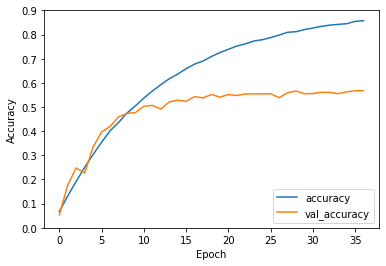

In [28]:
plt.plot(cnn_history.history['accuracy'], label='accuracy')
plt.plot(cnn_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 0.9])
plt.legend(loc='lower right')

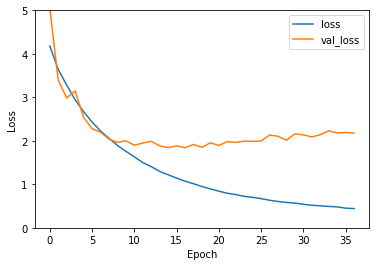

In [29]:
plt.plot(cnn_history.history['loss'], label='loss')
plt.plot(cnn_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 5])
plt.legend(loc='upper right')

DenseNet sme neimplementovali manuálne, použili sme Keras funkciu, ktorá nám vytvorí už hotovú architektúru. Napriek tomu, že tá mala až vyše 7 miliónov trénovateľných parametrov, tak nedosahovala také dobré výsledky ako klasická konvolučná sieť, výsledná presnosť na testovacích dátach dosiahla len hodnotu 41%. Aj v tomto prípade bol implementovaný early stopping s patience 10, sieť zastavila učenie už v 19. epoche. Rôzne formy optimalizácie, ako napríklad rozdielne režimy poolingu (global average, global max), alebo zmena počtu trénovateľných parametrov, nedokázali priniesť lepšie výsledky.

In [3]:
def build_densenet(inputs, input_shape):
    model = DenseNet121(weights=None, 
                        include_top=False,
                        input_shape=input_shape,
                        input_tensor=inputs) 
    x = model.output

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.25)(x) 

    x = layers.Dense(100, activation='softmax')(x)
    return x


input_shape = (32, 32, 3)
inputs = layers.Input(input_shape)
output = build_densenet(inputs, input_shape)
model = Model(inputs=inputs, outputs=output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 16, 16, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1/conv[0][0]']             
                                                                                              

 conv2_block4_1_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 8, 8, 128)   0           ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block4_2_conv (Conv2D)   (None, 8, 8, 32)     36864       ['conv2_block4_1_relu[0][0]']    
                                                                                                  
 conv2_block4_concat (Concatena  (None, 8, 8, 192)   0           ['conv2_block3_concat[0][0]',    
 te)                                                              'conv2_block4_2_conv[0][0]']    
          

                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 4, 4, 128)   512         ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 4, 4, 128)   0           ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 4, 4, 32)     36864       ['conv3_block2_1_relu[0][0]']    
                                                                                                  
 conv3_block2_concat (Concatena  (None, 4, 4, 192)   0           ['conv3_block1_concat[0][0]',    
 te)      

 conv3_block6_2_conv (Conv2D)   (None, 4, 4, 32)     36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 4, 4, 320)   0           ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 4, 4, 320)   1280        ['conv3_block6_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block7_0_relu (Activatio  (None, 4, 4, 320)   0           ['conv3_block7_0_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block11_0_relu (Activati  (None, 4, 4, 448)   0           ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 4, 4, 128)    57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_block11_1_bn (BatchNorma  (None, 4, 4, 128)   512         ['conv3_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_1_relu (Activati  (None, 4, 4, 128)   0           ['conv3_block11_1_bn[0][0]']     
 on)      

 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 2, 2, 320)   0           ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 2, 2, 128)    40960       ['conv4_block3_0_relu[0][0]']    
                                                                                                  
 conv4_block3_1_bn (BatchNormal  (None, 2, 2, 128)   512         ['conv4_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_blo

 conv4_block7_1_bn (BatchNormal  (None, 2, 2, 128)   512         ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 2, 2, 128)   0           ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_2_conv (Conv2D)   (None, 2, 2, 32)     36864       ['conv4_block7_1_relu[0][0]']    
                                                                                                  
 conv4_block7_concat (Concatena  (None, 2, 2, 480)   0           ['conv4_block6_concat[0][0]',    
 te)                                                              'conv4_block7_2_conv[0][0]']    
          

                                                                                                  
 conv4_block11_concat (Concaten  (None, 2, 2, 608)   0           ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 2, 2, 608)   2432        ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block12_0_relu (Activati  (None, 2, 2, 608)   0           ['conv4_block12_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block16_0_relu (Activati  (None, 2, 2, 736)   0           ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 2, 2, 128)    94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 2, 2, 128)   512         ['conv4_block16_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_1_relu (Activati  (None, 2, 2, 128)   0           ['conv4_block16_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block20_1_relu (Activati  (None, 2, 2, 128)   0           ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 2, 2, 32)     36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_block20_concat (Concaten  (None, 2, 2, 896)   0           ['conv4_block19_concat[0][0]',   
 ate)                                                             'conv4_block20_2_conv[0][0]']   
                                                                                                  
 conv4_block21_0_bn (BatchNorma  (None, 2, 2, 896)   3584        ['conv4_block20_concat[0][0]']   
 lization)

 ate)                                                             'conv4_block24_2_conv[0][0]']   
                                                                                                  
 pool4_bn (BatchNormalization)  (None, 2, 2, 1024)   4096        ['conv4_block24_concat[0][0]']   
                                                                                                  
 pool4_relu (Activation)        (None, 2, 2, 1024)   0           ['pool4_bn[0][0]']               
                                                                                                  
 pool4_conv (Conv2D)            (None, 2, 2, 512)    524288      ['pool4_relu[0][0]']             
                                                                                                  
 pool4_pool (AveragePooling2D)  (None, 1, 1, 512)    0           ['pool4_conv[0][0]']             
                                                                                                  
 conv5_blo

 conv5_block4_concat (Concatena  (None, 1, 1, 640)   0           ['conv5_block3_concat[0][0]',    
 te)                                                              'conv5_block4_2_conv[0][0]']    
                                                                                                  
 conv5_block5_0_bn (BatchNormal  (None, 1, 1, 640)   2560        ['conv5_block4_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block5_0_relu (Activatio  (None, 1, 1, 640)   0           ['conv5_block5_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block5_1_conv (Conv2D)   (None, 1, 1, 128)    81920       ['conv5_block5_0_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv5_block9_1_conv (Conv2D)   (None, 1, 1, 128)    98304       ['conv5_block9_0_relu[0][0]']    
                                                                                                  
 conv5_block9_1_bn (BatchNormal  (None, 1, 1, 128)   512         ['conv5_block9_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block9_1_relu (Activatio  (None, 1, 1, 128)   0           ['conv5_block9_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_blo

 conv5_block13_1_relu (Activati  (None, 1, 1, 128)   0           ['conv5_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block13_2_conv (Conv2D)  (None, 1, 1, 32)     36864       ['conv5_block13_1_relu[0][0]']   
                                                                                                  
 conv5_block13_concat (Concaten  (None, 1, 1, 928)   0           ['conv5_block12_concat[0][0]',   
 ate)                                                             'conv5_block13_2_conv[0][0]']   
                                                                                                  
 conv5_block14_0_bn (BatchNorma  (None, 1, 1, 928)   3712        ['conv5_block13_concat[0][0]']   
 lization)                                                                                        
          

In [4]:
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [5]:
epochs = 100
validation_split = 0.2
early_stoppinb_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

dense_history = model.fit(train_x, train_y,
    epochs=epochs,
    validation_split=validation_split,
    callbacks=[early_stoppinb_callback])

Epoch 1/100
1250/1250 [==============================] - 202s 140ms/step - loss: 4.4451 - accuracy: 0.0851 - val_loss: 3.8984 - val_accuracy: 0.1078
Epoch 2/100
1250/1250 [==============================] - 166s 133ms/step - loss: 3.7499 - accuracy: 0.1562 - val_loss: 6.1365 - val_accuracy: 0.1058
Epoch 3/100
1250/1250 [==============================] - 167s 134ms/step - loss: 3.2119 - accuracy: 0.2282 - val_loss: 3.4626 - val_accuracy: 0.1990
Epoch 4/100
1250/1250 [==============================] - 167s 134ms/step - loss: 2.8490 - accuracy: 0.2850 - val_loss: 3.0518 - val_accuracy: 0.2673
Epoch 5/100
1250/1250 [==============================] - 174s 139ms/step - loss: 2.5648 - accuracy: 0.3403 - val_loss: 3.3250 - val_accuracy: 0.2387
Epoch 6/100
1250/1250 [==============================] - 158s 126ms/step - loss: 2.3369 - accuracy: 0.3872 - val_loss: 3.0490 - val_accuracy: 0.2846
Epoch 7/100
1250/1250 [==============================] - 151s 121ms/step - loss: 2.1559 - accuracy: 0.4260

In [6]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 13s 40ms/step - loss: 2.2720 - accuracy: 0.4146


[2.2720274925231934, 0.4146000146865845]

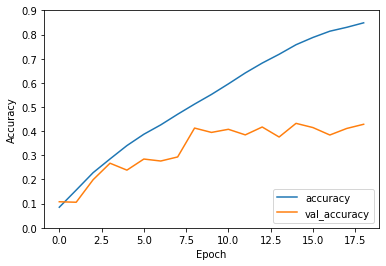

In [7]:
plt.plot(dense_history.history['accuracy'], label='accuracy')
plt.plot(dense_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 0.9])
plt.legend(loc='lower right')

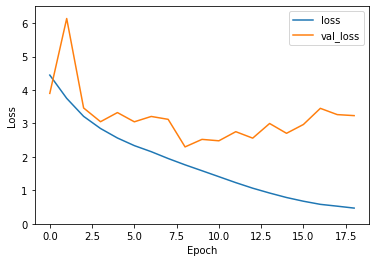

In [10]:
plt.plot(dense_history.history['loss'], label='loss')
plt.plot(dense_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 6.5])
plt.legend(loc='upper right')